In [36]:
import struct
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
import sys
from math import sqrt
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

In [10]:
def read_image(file_name, idx_image):

	img_file = open(file_name,'r+b')
	print(img_file)
	##########################################
	# Get basic information about the images #
	# (This is described in the webpage of 	 #
	# the database)							 #
	##########################################
	img_file.seek(0)
	magic_number = img_file.read(4)
	magic_number = struct.unpack('>i',magic_number)
	print('Magic Numbers: '+str(magic_number[0]))
		
	data_type = img_file.read(4)
	data_type = struct.unpack('>i',data_type)
	print('Number of Images: '+str(data_type[0]))


	dim = img_file.read(8)
	dimr = struct.unpack('>i',dim[0:4])
	dimr = dimr[0]
	print('Number of Rows: '+str(dimr))
	dimc = struct.unpack('>i',dim[4:])
	dimc = dimc[0]
	print('Number of Columns:'+str(dimc))


	image = np.ndarray(shape=(dimr,dimc))
	img_file.seek(16+dimc*dimr*idx_image)
	
	for row in range(dimr):
		for col in range(dimc):
			tmp_d = img_file.read(1)
			tmp_d = struct.unpack('>B',tmp_d)
			image[row,col] = tmp_d[0]
	
	img_file.close()
	return image

def read_all_image(file_name, idx_image):

	img_file = open(file_name,'r+b')
	print(img_file)
	##########################################
	# Get basic information about the images #
	# (This is described in the webpage of 	 #
	# the database)							 #
	##########################################
	img_file.seek(0)
	magic_number = img_file.read(4)
	magic_number = struct.unpack('>i',magic_number)
	print('Magic Numbers: '+str(magic_number[0]))
		
	data_type = img_file.read(4)
	data_type = struct.unpack('>i',data_type)
	print('Number of Images: '+str(data_type[0]))


	dim = img_file.read(8)
	dimr = struct.unpack('>i',dim[0:4])
	dimr = dimr[0]
	print('Number of Rows: '+str(dimr))
	dimc = struct.unpack('>i',dim[4:])
	dimc = dimc[0]
	print('Number of Columns:'+str(dimc))


	image = np.ndarray(shape=(data_type[0],dimr*dimc))
	img_file.seek(16+dimc*dimr*0)
	
	for row in range(data_type[0]-1):
		for col in range(dimc*dimr):
			tmp_d = img_file.read(1)
			tmp_d = struct.unpack('>B',tmp_d)
			image[row,col] = tmp_d[0]
	
	img_file.close()
	return image

	#image = read_image('data/train-images-idx3-ubyte',59999)
	#img_plot = plt.imshow(image,'Greys')
	#plt.show()
	#f = gzip.open('/Users/arunnaga/Downloads/Python Projects/Image Database/mnist.pkl.gz', 'rb')
	#u = pickle._Unpickler(f)    
	#train_set, valid_set, test_set = pickle.load(f,encoding = 'latin1')
	#f.close()


def read_labels(file_name):
	img_file = open(file_name,'r+b')
	print(img_file)
	img_file.seek(0)
	magic_number = img_file.read(4)
	magic_number = struct.unpack('>i',magic_number)
	print('Magic Numbers: '+str(magic_number[0]))
	
	data_type = img_file.read(4)
	data_type = struct.unpack('>i',data_type)
	print('Number of Lables: '+str(data_type[0]))
    
	labels = np.ndarray(shape=(data_type[0],1))
	img_file.seek(8)
    
	for row in range(data_type[0]-1):
		tmp_d = img_file.read(1)
		tmp_d = struct.unpack('>B',tmp_d)
		labels[row,0] = tmp_d[0]
    
	img_file.close()
	return labels

In [11]:
hm_dir='/home/arunnaga/workplace/PythonProjects/ImageRecognition/'
train_images=read_all_image(hm_dir+'train-images-idx3-ubyte',2)
train_labels=read_labels(hm_dir+'train-labels-idx1-ubyte')
test_images=read_all_image(hm_dir+'t10k-images-idx3-ubyte',2)
test_labels=read_labels(hm_dir+'t10k-labels-idx1-ubyte')

<_io.BufferedRandom name='/home/arunnaga/workplace/PythonProjects/ImageRecognition/train-images-idx3-ubyte'>
Magic Numbers: 2051
Number of Images: 60000
Number of Rows: 28
Number of Columns:28
<_io.BufferedRandom name='/home/arunnaga/workplace/PythonProjects/ImageRecognition/train-labels-idx1-ubyte'>
Magic Numbers: 2049
Number of Lables: 60000
<_io.BufferedRandom name='/home/arunnaga/workplace/PythonProjects/ImageRecognition/t10k-images-idx3-ubyte'>
Magic Numbers: 2051
Number of Images: 10000
Number of Rows: 28
Number of Columns:28
<_io.BufferedRandom name='/home/arunnaga/workplace/PythonProjects/ImageRecognition/t10k-labels-idx1-ubyte'>
Magic Numbers: 2049
Number of Lables: 10000


In [12]:
# Add Columns to the Dataframe
columns = ['f'+str(i) for i in range(1, 784+1)]
index = ['in'+str(i) for i in range(1, 784+1)]

In [13]:
# TRaining Data - 60,000 images

df_train=pd.DataFrame(data=train_images[0:,0:],    # values
	index=train_images[0:,0],   # 1st column as index
	columns=columns)  # 1st row as the column names
# ------ Y in the last row is incorrect 
df_train['label'] = train_labels
        

# Test data - 10,000 images
        
df_test=pd.DataFrame(data=test_images[0:,0:],    # values
	index=test_images[0:,0],   # 1st column as index
	columns=columns)  # 1st row as the column names

df_test['label'] = test_labels

<_io.BufferedRandom name='/home/arunnaga/workplace/PythonProjects/ImageRecognition/train-images-idx3-ubyte'>
Magic Numbers: 2051
Number of Images: 60000
Number of Rows: 28
Number of Columns:28


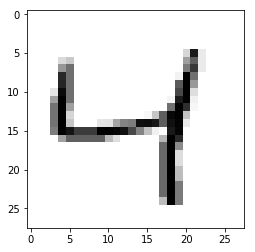

In [14]:
inputfile=hm_dir+'train-images-idx3-ubyte'
idx=2
image = read_image(inputfile,idx)
img_plot = plt.imshow(image,'Greys')
plt.show()

In [16]:
# Random Forest implmenetation
num_features_for_split = int(sqrt(784))
rf = RandomForestClassifier(n_estimators=num_features_for_split, n_jobs=-1)
rf.fit(df_train.ix[:, df_train.columns != 'label'],df_train['label'])
#rf.predict(df_test.head(10).ix[:, df_test.head(10).columns != 'label'])
rf.score(df_test.ix[:, df_test.columns != 'label'],df_test['label'])

0.9627

In [24]:
# Support Vector Machine
clf = svm.SVC()
clf.fit(df_train.head(5000).ix[:, df_train.head(5000).columns != 'label'],df_train['label'].head(5000)) 
clf.score(df_test.head(1000).ix[:, df_test.head(1000).columns != 'label'],df_test['label'].head(1000))

0.126

In [25]:
df_train.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f776,f777,f778,f779,f780,f781,f782,f783,f784,label
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0


In [31]:
# Logistic Regression
lr = LogisticRegression(n_jobs=-1,max_iter=30,tol=0.001)
lr = lr.fit(df_train.ix[:, df_train.columns != 'label'],df_train['label'])
lr.score(df_test.ix[:, df_test.columns != 'label'],df_test['label'])

0.91830000000000001

In [ ]:
# SVC with Bagging for faster processing
n_estimators = 10
clf = OneVsRestClassifier(BaggingClassifier(SVC(kernel='linear', probability=True, class_weight='balanced'), max_samples=1.0 / n_estimators, n_estimators=n_estimators))
clf.fit(df_train.ix[:, df_train.columns != 'label'],df_train['label'])
clf.score(df_test.ix[:, df_test.columns != 'label'],df_test['label'])

/home/arunnaga/anaconda3/lib/python3.6/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/home/arunnaga/anaconda3/lib/python3.6/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/home/arunnaga/anaconda3/lib/python3.6/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/home/arunnaga/anaconda3/lib/python3.6/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in 

In [ ]:
clf.score(df_test.ix[:, df_test.columns != 'label'],df_test['label'])